# Machine Learning on [Vestiaire Collective](https://fr.vestiairecollective.com/) data 

## Libraries

In [1]:
import numpy as np 
import pickle as pkl
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
from sklearn.decomposition import PCA, FactorAnalysis

In [4]:
from sklearn.dummy import DummyClassifier

In [5]:
from sklearn.model_selection import (
    train_test_split,
    GridSearchCV,
    cross_val_score,
)

In [26]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

In [7]:
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
)

## Load train and test data

In [24]:
save_path_train = "C:/Users/pemma/OneDrive - Université de Tours/Mécen/M2/S1/02 - Machine Learning/05 - Projet/ML_Vestiaire_Collective/backup/train_data.pkl"
save_path_test = "C:/Users/pemma/OneDrive - Université de Tours/Mécen/M2/S1/02 - Machine Learning/05 - Projet/ML_Vestiaire_Collective/backup/train_data.pkl"

In [9]:
with open(save_path_train, "rb") as file:
    train_data = pkl.load(file)
with open(save_path_test, "rb") as file:
    test_data = pkl.load(file)

In [10]:
X_train, Y_train = train_data["X"], train_data["y"]

In [18]:
X_test, Y_test = test_data["X"], test_data["y"]

In [11]:
X_train.shape[0] == Y_train.shape[0]

True

## Dimensionality reduction 

### PCA 

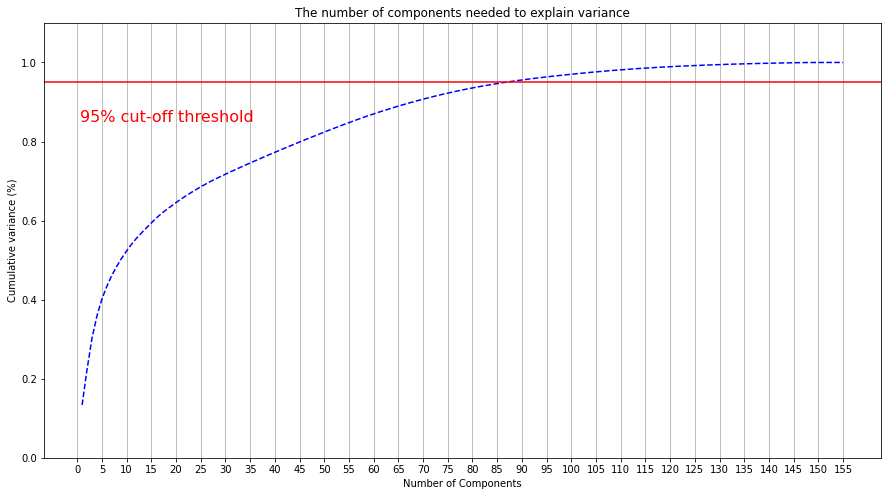

In [38]:
pca = PCA().fit(X_train)

xi = np.arange(1, 156, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

fig, ax = plt.subplots(figsize=(15, 8))

ax.set_ylim(0.0, 1.1)
ax.plot(xi, y, linestyle='--', color='b')

ax.set_xlabel('Number of Components')
ax.set_xticks(np.arange(0, 156, step=5))                                      # change from 0-based array index to 1-based human-readable label
ax.set_ylabel('Cumulative variance (%)')
ax.set_title('The number of components needed to explain variance')

ax.axhline(y=0.95, color='r', linestyle='-')
ax.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')

In [12]:
# 95% explained variance 
pca = PCA(n_components = 0.95)

In [13]:
pca.fit(X_train)

PCA(n_components=0.95)

In [14]:
X_train_reduced = pca.transform(X_train)

In [15]:
X_train_reduced.shape

(7205, 87)

In [43]:
pca.get_params()

{'copy': True,
 'iterated_power': 'auto',
 'n_components': 0.95,
 'random_state': None,
 'svd_solver': 'auto',
 'tol': 0.0,
 'whiten': False}

In [44]:
pca.n_components_

87

In [20]:
# reduce the testing set 
X_test_reduced = pca.transform(X_test)

In [21]:
# add reduced data sets to train_data and test_data
train_data["X_reduced"] = X_train_reduced
test_data["X_reduced"] = X_test_reduced

In [25]:
# save updated train_data and test_data
with open(save_path_train,"wb") as file:
    pkl.dump(train_data, file)

with open(save_path_test,"wb") as file:
    pkl.dump(test_data, file)

## Predict the `price` target variable 

In [36]:
results = dict()

In [33]:
y_train = Y_train[:, 0]

In [27]:
lin_reg = LinearRegression()

In [34]:
score = cross_val_score(
    lin_reg, 
    X_train_reduced, 
    y_train,
)

In [37]:
results[lin_reg] = np.mean(score)

## Predict the dummy variable `we_love_tag`

In [53]:
y_train = Y_train[:, 2]
y_train.shape

(7205,)

In [55]:
# dict to store the cross-validation scores
results = dict()

### Dummy Classifier

In [88]:
dummy = DummyClassifier(strategy="most_frequent")

In [89]:
score = cross_val_score(
    dummy, 
    X_train_reduced, 
    y_train,
)

In [90]:
results[dummy] = np.mean(score)

In [91]:
results

{DummyClassifier(strategy='most_frequent'): 0.6002775850104094,
 GridSearchCV(estimator=LogisticRegression(),
              param_grid={'C': [0.1, 1.0, 10, 100], 'max_iter': [1000]}): 0.6523247744621791,
 GridSearchCV(estimator=KNeighborsClassifier(),
              param_grid={'n_neighbors': [3, 5, 7, 9]}): 0.6252602359472588,
 GaussianNB(): 0.5514226231783483,
 GridSearchCV(estimator=RandomForestClassifier(),
              param_grid={'n_estimators': [50, 100, 150, 200]}): 0.6480222068008328,
 GridSearchCV(estimator=MLPClassifier(),
              param_grid={'hidden_layer_sizes': [(200,), (100, 100),
                                                 (50, 100, 50),
                                                 (25, 75, 75, 25)],
                          'max_iter': [1000]}): 0.6313671061762665,
 DummyClassifier(strategy='most_frequent'): 0.6002775850104094}

### Basic models 

In [92]:
c = LogisticRegression()

In [93]:
g = GridSearchCV(
    estimator=c,
    param_grid={
        "C": [0.1, 1., 10, 100],
        "max_iter": [1000,],
    }
)

In [94]:
g.fit(X_train_reduced, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1.0, 10, 100], 'max_iter': [1000]})

In [95]:
results[g] = g.best_score_

In [96]:
results

{DummyClassifier(strategy='most_frequent'): 0.6002775850104094,
 GridSearchCV(estimator=LogisticRegression(),
              param_grid={'C': [0.1, 1.0, 10, 100], 'max_iter': [1000]}): 0.6523247744621791,
 GridSearchCV(estimator=KNeighborsClassifier(),
              param_grid={'n_neighbors': [3, 5, 7, 9]}): 0.6252602359472588,
 GaussianNB(): 0.5514226231783483,
 GridSearchCV(estimator=RandomForestClassifier(),
              param_grid={'n_estimators': [50, 100, 150, 200]}): 0.6480222068008328,
 GridSearchCV(estimator=MLPClassifier(),
              param_grid={'hidden_layer_sizes': [(200,), (100, 100),
                                                 (50, 100, 50),
                                                 (25, 75, 75, 25)],
                          'max_iter': [1000]}): 0.6313671061762665,
 DummyClassifier(strategy='most_frequent'): 0.6002775850104094,
 GridSearchCV(estimator=LogisticRegression(),
              param_grid={'C': [0.1, 1.0, 10, 100], 'max_iter': [1000]}): 0.64691

In [67]:
c = KNeighborsClassifier()
c.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [68]:
g = GridSearchCV(
    estimator=c,
    param_grid={
        "n_neighbors": [3, 5, 7, 9],
    }
)
g.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9]})

In [69]:
results[g] = g.best_score_

In [71]:
c = GaussianNB()
c.get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [72]:
score = cross_val_score(c, X_train, y_train)
results[c] = np.mean(score)

In [73]:
results

{DummyClassifier(strategy='most_frequent'): 0.6002775850104094,
 GridSearchCV(estimator=LogisticRegression(),
              param_grid={'C': [0.1, 1.0, 10, 100], 'max_iter': [1000]}): 0.6523247744621791,
 GridSearchCV(estimator=KNeighborsClassifier(),
              param_grid={'n_neighbors': [3, 5, 7, 9]}): 0.6252602359472588,
 GaussianNB(): 0.5514226231783483}

### More advanced models

In [74]:
c = RandomForestClassifier()
c.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [75]:
g = GridSearchCV(
    estimator=c,
    param_grid={
        "n_estimators": [50, 100, 150, 200],
    }
)

In [76]:
g.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [50, 100, 150, 200]})

In [77]:
results[g] = g.best_score_

In [79]:
c = MLPClassifier()
c.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [80]:
g = GridSearchCV(
    estimator=c,
    param_grid={
        "hidden_layer_sizes": [(200, ), (100, 100), (50, 100, 50), (25, 75, 75, 25)],
        "max_iter": [1000,],
    }
)

In [81]:
g.fit(X_train, y_train)

GridSearchCV(estimator=MLPClassifier(),
             param_grid={'hidden_layer_sizes': [(200,), (100, 100),
                                                (50, 100, 50),
                                                (25, 75, 75, 25)],
                         'max_iter': [1000]})

In [82]:
results[g] = g.best_score_

In [83]:
c = SVC()
c.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [86]:
results

{DummyClassifier(strategy='most_frequent'): 0.6002775850104094,
 GridSearchCV(estimator=LogisticRegression(),
              param_grid={'C': [0.1, 1.0, 10, 100], 'max_iter': [1000]}): 0.6523247744621791,
 GridSearchCV(estimator=KNeighborsClassifier(),
              param_grid={'n_neighbors': [3, 5, 7, 9]}): 0.6252602359472588,
 GaussianNB(): 0.5514226231783483,
 GridSearchCV(estimator=RandomForestClassifier(),
              param_grid={'n_estimators': [50, 100, 150, 200]}): 0.6480222068008328,
 GridSearchCV(estimator=MLPClassifier(),
              param_grid={'hidden_layer_sizes': [(200,), (100, 100),
                                                 (50, 100, 50),
                                                 (25, 75, 75, 25)],
                          'max_iter': [1000]}): 0.6313671061762665}